In [49]:
from PIL import Image
import numpy as np
img = Image.open('dalat.jpg')
img.show()

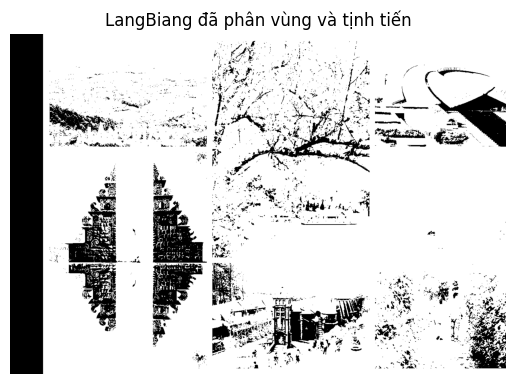

In [50]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters.thresholding import threshold_otsu

image_path = 'daLat.jpg'
img = Image.open(image_path).convert('L')  

a = np.asarray(img)

thres = threshold_otsu(a)

manual_threshold = 0.3 * 255

mask = a > manual_threshold

mask_img = (mask * 255).astype(np.uint8)

translated_mask = np.zeros_like(mask_img)
translated_mask[:, 100:] = mask_img[:, :-100]

result = Image.fromarray(translated_mask)

result.save("lang_biang.jpg")

plt.imshow(result, cmap='gray')
plt.title("LangBiang đã phân vùng và tịnh tiến")
plt.axis("off")
plt.show()


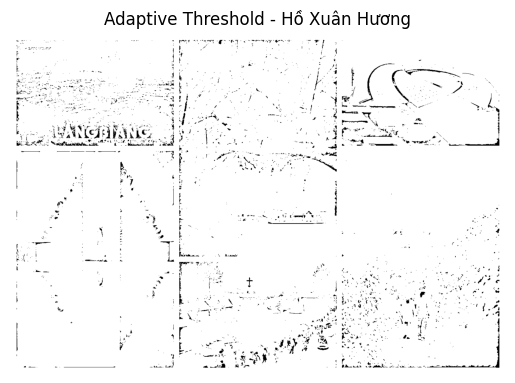

In [51]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

data = Image.open('dalat.jpg').convert('L')  

a = np.asarray(data)

thresh = threshold_local(a, block_size=45, offset=60)

binary = (a > thresh).astype(np.uint8) * 255

b = Image.fromarray(binary)

b.save("ho_xuan_huong.jpg")

plt.imshow(b, cmap='gray')
plt.title("Adaptive Threshold - Hồ Xuân Hương")
plt.axis("off")
plt.show()



Đã lưu ảnh: quan_truong_lam_vien.jpg


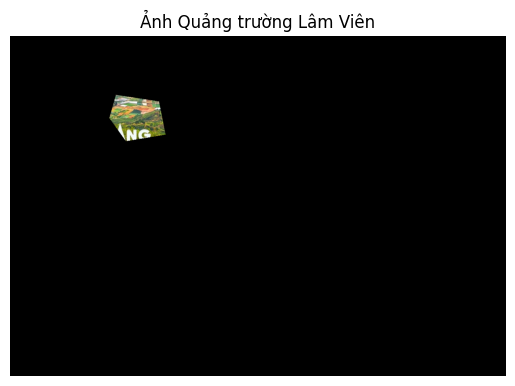

In [52]:
import cv2
import numpy as np
from PIL import Image
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.draw import polygon
import matplotlib.pyplot as plt

img_path = 'dalat.jpg'  
img = iio.imread(img_path)

coords = np.array([
    [320, 180],
    [450, 200],
    [470, 300],
    [350, 320],
    [300, 250]
])

mask = np.zeros(img.shape[:2], dtype=bool)
rr, cc = polygon(coords[:, 1], coords[:, 0]) 
mask[rr, cc] = True

struct = np.ones((20, 20))  
closed_mask = nd.binary_closing(mask, structure=struct).astype(np.uint8)

result = img.copy()
result[closed_mask == 0] = 0  

iio.imwrite('quan_truong_lam_vien.jpg', result)
print("Đã lưu ảnh: quan_truong_lam_vien.jpg")

plt.imshow(result)
plt.title("Ảnh Quảng trường Lâm Viên")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion
from skimage.filters import threshold_local
from PIL import Image

def coordinate_mapping(img):
    print("Applying Coordinate Mapping...")
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 50], [0, 1, 30]]) 
    return cv2.warpAffine(img, M, (cols, rows))


def rotate(img, angle=45):
    print("Rotating image...")
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))


def scale(img, fx=1.5, fy=1.5):
    print("Scaling image...")
    return cv2.resize(img, None, fx=fx, fy=fy)


def shift(img, tx=100, ty=50):
    print("Shifting image...")
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    rows, cols = img.shape[:2]
    return cv2.warpAffine(img, M, (cols, rows))


def adaptive_thresholding(img):
    print("Applying Adaptive Thresholding...")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = threshold_local(gray, 35, offset=10)
    binary = gray > thresh
    return (binary * 255).astype(np.uint8)


def binary_dilation_segment(img):
    print("Applying Binary Dilation...")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary = gray > 127
    dilated = binary_dilation(binary)
    return (dilated * 255).astype(np.uint8)


def binary_erosion_segment(img):
    print("Applying Binary Erosion...")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary = gray > 127
    eroded = binary_erosion(binary)
    return (eroded * 255).astype(np.uint8)


def otsu(img):
    print("Applying Otsu Thresholding...")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def main():
    img = cv2.imread('dalat.jpg')
    if img is None:
        print("Không tìm thấy ảnh.")
        return

    print("===== MENU =====")
    print("1. coordinate_mapping")
    print("2. rotate")
    print("3. scale")
    print("4. shift")
    print("5. adaptive_thresholding")
    print("6. binary_dilation")
    print("7. binary_erosion")
    print("8. otsu")
    print("Nhập lựa chọn cách nhau bằng dấu phẩy nếu muốn chọn 2 chức năng (ví dụ: 1,5)")
    
    choices = input("Nhập lựa chọn của bạn: ").strip().split(',')

    for i in range(len(choices)):
        choices[i] = int(choices[i])

    result = img.copy()

    for choice in choices:
        if choice == 1:
            result = coordinate_mapping(result)
        elif choice == 2:
            result = rotate(result)
        elif choice == 3:
            result = scale(result)
        elif choice == 4:
            result = shift(result)
        elif choice == 5:
            result = adaptive_thresholding(result)
        elif choice == 6:
            result = binary_dilation_segment(result)
        elif choice == 7:
            result = binary_erosion_segment(result)
        elif choice == 8:
            result = otsu(result)
        else:
            print("Lựa chọn không hợp lệ:", choice)

    if len(result.shape) == 2:
        plt.imshow(result, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    
    plt.title("Kết quả xử lý")
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    main()


===== MENU =====
1. coordinate_mapping
2. rotate
3. scale
4. shift
5. adaptive_thresholding
6. binary_dilation
7. binary_erosion
8. otsu
Nhập lựa chọn cách nhau bằng dấu phẩy nếu muốn chọn 2 chức năng (ví dụ: 1,5)
